In [3]:
!pip install --upgrade pip wheel setuptools

# Go 없이 설치 가능한 예전 버전 사용
!pip install "wandb<0.23"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 51.3 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
  Using cached gitpython-3.1.45-py3-none-any.whl.metadata (13 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 142.1 MB/s  0:00:00
Using cached gitpython-3.1.45-py3-none-any.whl (208 kB)
Using cached gitdb-4.0.12-py3-none-any.whl (62 kB)
Using cached smmap-5.0.2-py3-none-any.whl (24 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [wandb]32m4/5 [wandb]-sdk]


In [5]:
!pip install numpy
!pip install pandas
!pip install torch
!pip install scikit-learn
!pip install tqdm


In [8]:
import os
import wandb

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader, random_split

from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

print(device)

cuda


## Environment Setting

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
csv_filename = 'spy_2023_2024.csv'
csv_filepath = '/content/drive/MyDrive/2025 ML Project/datasets/spy_data.csv'

save_dir = 'prepared_data/'

In [83]:
wandb.finish()

In [79]:
wandb.login()


True

## Data Download (Legacy)

In [12]:
!pip install yfinance

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.5 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 157.2 MB/s  0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15636 sha256=869ba0bf3ce8116783e491a1dfedbbe2cbadc848df0d817bcb9fcd373f8aa903
  Stored in directory: /home/ec2-user/.cache/pip/wheels/e9/25/85/25d2e1cfc0ece64b930b16972f7e4cc3599c43b531f1eba06d
  Created wheel for peewee: filename=peewee-3.18.3-cp310-cp310-linux_x86_64.whl size=303010 sha256=b27549d3be5ca2efc9890e055dc553dd051560be9f295cc122fc78a9928d8b82
  Stored in directory: /home/ec2-user/.cache/pip/wheels/3d/96/39/80c50cbf6bd446cdca9dac7d78a1a0d3a1f313859500529f8d
Successfully built m

In [11]:
import yfinance as yf

snp500_data = yf.download("^GSPC", start="2005-01-01", end="2025-01-01", interval="30m")

ModuleNotFoundError: No module named 'yfinance'

In [ ]:
snp500_data.columns = snp500_data.columns.droplevel(level='Ticker')
snp500_data

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,


In [ ]:
# Save Data to csv
snp500_data.to_csv(csv_filename, index=True, encoding='utf-8-sig')

## Data Download

In [13]:
%pip install alpha_vantage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [alpha_vantage]0m [aiohttp]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#from google.colab import userdata
#alphavantage_api = userdata.get('AlphaVantage')

In [ ]:
csv_filename = 'spy_2023_data.csv'

In [ ]:
# Get SPY data
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='KFRTXN68V3DJZB4M', output_format='pandas')

month_data = []

for month in range(1, 13):
  month_str = f'{month:02d}'
  year_month = f'2023-{month_str}'

  try:
        print(f'Get {year_month} data')
        data, meta_data = ts.get_intraday(
            symbol='SPY',
            interval='30min',
            month=year_month,
            extended_hours='false',
            outputsize='full'
        )
        month_data.append(data)

        # api limit
        time.sleep(15)

  except Exception as e:
      print(f'Error with {year_month} : {e}')

if month_data:
    combined_data = pd.concat(month_data)
    combined_data.sort_index(inplace=True)
    print(combined_data.head())
    print(combined_data.tail())
else:
    print("No data")

Get 2023-01 data
Error with 2023-01 : name 'time' is not defined
Get 2023-02 data
Error with 2023-02 : name 'time' is not defined
Get 2023-03 data
Error with 2023-03 : name 'time' is not defined
Get 2023-04 data
Error with 2023-04 : name 'time' is not defined
Get 2023-05 data
Error with 2023-05 : name 'time' is not defined
Get 2023-06 data
Error with 2023-06 : name 'time' is not defined
Get 2023-07 data
Error with 2023-07 : name 'time' is not defined
Get 2023-08 data
Error with 2023-08 : name 'time' is not defined
Get 2023-09 data
Error with 2023-09 : name 'time' is not defined
Get 2023-10 data
Error with 2023-10 : name 'time' is not defined
Get 2023-11 data
Error with 2023-11 : name 'time' is not defined
Get 2023-12 data
Error with 2023-12 : name 'time' is not defined
                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2023-01-03 09:30:00  370.5398  372.5257  367.9274  367.9755  7391068.0
2023-01

In [ ]:
combined_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-01-03 09:30:00,370.5398,372.5257,367.9274,367.9755,7391068.0
2023-01-03 10:00:00,368.0334,368.8142,366.4669,367.2332,4314212.0
2023-01-03 10:30:00,367.1850,368.3467,366.3946,368.2937,3567632.0
2023-01-03 11:00:00,368.3032,368.5732,365.8258,366.3639,4035712.0
2023-01-03 11:30:00,366.3656,366.3753,365.0256,365.4305,3691236.0
...,...,...,...,...,...
2023-12-29 13:30:00,464.4200,465.2323,464.4053,464.9681,3845062.0
2023-12-29 14:00:00,464.9779,465.3694,464.8115,464.9681,5011503.0
2023-12-29 14:30:00,464.9681,465.5994,464.9681,465.4721,8167928.0


In [ ]:
# Save Data to csv
combined_data.to_csv(csv_filename, index=True, encoding='utf-8-sig')

In [ ]:
zeros_per_column = (combined_data == 0).sum()
zeros_per_column

,0
1. open,0
2. high,0
3. low,0
4. close,0
5. volume,0


## Data Preprocessing

In [36]:
# csv to DF
data = pd.read_csv(csv_filename)
data["date"] = pd.to_datetime(data["date"])

In [37]:
data

,Unnamed: 0,date,1. open,2. high,3. low,4. close,5. volume
0,0,2023-01-03 09:30:00,370.5398,372.5257,367.9274,367.9755,7391068.0
1,1,2023-01-03 10:00:00,368.0334,368.8142,366.4669,367.2332,4314212.0
2,2,2023-01-03 10:30:00,367.1850,368.3467,366.3946,368.2937,3567632.0
3,3,2023-01-03 11:00:00,368.3032,368.5732,365.8258,366.3639,4035712.0
4,4,2023-01-03 11:30:00,366.3656,366.3753,365.0256,365.4305,3691236.0
...,...,...,...,...,...,...,...
6521,6521,2024-12-31 13:30:00,579.9381,581.4202,579.8440,580.2603,1760552.0
6522,6522,2024-12-31 14:00:00,580.2801,581.4696,579.5069,579.8638,3210970.0
6523,6523,2024-12-31 14:30:00,579.8440,581.2516,579.3483,581.2417,3129664.0
6524,6524,2024-12-31 15:00:00,581.2219,582.2033,580.0918,582.1340,3598139.0


In [38]:
## 하루를 기준으로 정규화
def normalize_per_day(group):
  ohlc = ['1. open', '2. high', '3. low', '4. close']

  min_val = group[ohlc].min().min()
  max_val = group[ohlc].max().max()

  if max_val - min_val > 0:
    group[ohlc] = (group[ohlc] - min_val) / (max_val - min_val)
  else:
    group[ohlc] = 0.5

  ## 일단 volume도 하루 단위로 정규화
  min_vol = group['5. volume'].min()
  max_vol = group['5. volume'].max()
  group['5. volume'] = (group['5. volume'] - min_vol) / (max_vol - min_vol)

  return group

normalized_data = data.groupby(data['date'].dt.date).apply(normalize_per_day)

In [99]:
normalized_data

Unnamed: 0                date   1. open   2. high    3. low  \
date                                                                            
2023-01-03 0              0 2023-01-03 09:30:00  0.760435  1.000000  0.445293   
           1              1 2023-01-03 10:00:00  0.458080  0.552270  0.269108   
           2              2 2023-01-03 10:30:00  0.355735  0.495874  0.260387   
           3              3 2023-01-03 11:00:00  0.490627  0.523198  0.191770   
           4              4 2023-01-03 11:30:00  0.256888  0.258058  0.095240   
...                     ...                 ...       ...       ...       ...   
2024-12-31 6521        6521 2024-12-31 13:30:00  0.095655  0.336026  0.080394   
           6522        6522 2024-12-31 14:00:00  0.151121  0.344037  0.025722   
           6523        6523 2024-12-31 14:30:00  0.080394  0.308682  0.000000   
           6524        6524 2024-12-31 15:00:00  0.303865  0.463031  0.120583   
           6525        6525 2024-12-31 15:30:00  0.451775  0.495175  0.088422   

                 4. close  5. volume  
date                                  
2023-01-03 0     0.451095   1.000000  
           1     0.361549   0.438819  
           2     0.489481   0.302651  
           3     0.256683   0.388024  
           4     0.144084   0.325195  
...                   ...        ...  
2024-12-31 6521  0.147910   0.012937  
           6522  0.083605   0.145332  
           6523  0.307076   0.137911  
           6524  0.451791   0.180674  
           6525  0.255632   1.000000  

[6526 rows x 7 columns]

In [40]:
normalized_data.head(14)

Unnamed: 0                date   1. open   2. high    3. low  \
date                                                                          
2023-01-03 0            0 2023-01-03 09:30:00  0.760435  1.000000  0.445293   
           1            1 2023-01-03 10:00:00  0.458080  0.552270  0.269108   
           2            2 2023-01-03 10:30:00  0.355735  0.495874  0.260387   
           3            3 2023-01-03 11:00:00  0.490627  0.523198  0.191770   
           4            4 2023-01-03 11:30:00  0.256888  0.258058  0.095240   
           5            5 2023-01-03 12:00:00  0.148741  0.220843  0.069666   
           6            6 2023-01-03 12:30:00  0.131876  0.254572  0.000000   
           7            7 2023-01-03 13:00:00  0.092924  0.215692  0.059195   
           8            8 2023-01-03 13:30:00  0.196415  0.251074  0.131297   
           9            9 2023-01-03 14:00:00  0.233630  0.278988  0.111525   
           10          10 2023-01-03 14:30:00  0.135953  0.339461  0.030122   
           11          11 2023-01-03 15:00:00  0.254572  0.385978  0.231302   
           12          12 2023-01-03 15:30:00  0.295274  0.403421  0.285961   
2023-01-04 13          13 2023-01-04 09:30:00  0.540805  0.709177  0.323125   

               4. close  5. volume  
date                                
2023-01-03 0   0.451095   1.000000  
           1   0.361549   0.438819  
           2   0.489481   0.302651  
           3   0.256683   0.388024  
           4   0.144084   0.325195  
           5   0.128969   0.096589  
           6   0.090595   0.131098  
           7   0.196415   0.000000  
           8   0.232472   0.008069  
           9   0.134783   0.086460  
           10  0.256876   0.366619  
           11  0.294103   0.294148  
           12  0.349920   0.981363  
2023-01-04 13  0.549326   0.480972

date            
2023-01-03  0      2023-01-03 09:30:00
            1      2023-01-03 10:00:00
            2      2023-01-03 10:30:00
            3      2023-01-03 11:00:00
            4      2023-01-03 11:30:00
                           ...        
2024-12-31  6521   2024-12-31 13:30:00
            6522   2024-12-31 14:00:00
            6523   2024-12-31 14:30:00
            6524   2024-12-31 15:00:00
            6525   2024-12-31 15:30:00
Name: date, Length: 6526, dtype: datetime64[ns]

In [41]:
class SPYDataSet(Dataset):
  def __init__(self, data, features, chunk_size):
    self.chunk_size = chunk_size

    arr = data[features].to_numpy(dtype=np.float32)
    self.arr = arr
    self.N, self.C = arr.shape

    self.num_chunks = self.N // self.chunk_size

  def __len__(self):
    return self.num_chunks

  def __getitem__(self, idx: int):
    start = idx * self.chunk_size
    end = start + self.chunk_size

    x = self.arr[start:end]
    x = torch.from_numpy(x).float().T
    return {"x": x, "idx": idx}

In [42]:
feature_cols = ['1. open', '2. high', '3. low', '4. close', '5. volume']

ds = SPYDataSet(normalized_data, features=feature_cols, chunk_size=13)
print(len(ds))

502


In [43]:
ds[0] # C(5) * T(13)

{'x': tensor([[0.7604, 0.4581, 0.3557, 0.4906, 0.2569, 0.1487, 0.1319, 0.0929, 0.1964,
          0.2336, 0.1360, 0.2546, 0.2953],
         [1.0000, 0.5523, 0.4959, 0.5232, 0.2581, 0.2208, 0.2546, 0.2157, 0.2511,
          0.2790, 0.3395, 0.3860, 0.4034],
         [0.4453, 0.2691, 0.2604, 0.1918, 0.0952, 0.0697, 0.0000, 0.0592, 0.1313,
          0.1115, 0.0301, 0.2313, 0.2860],
         [0.4511, 0.3615, 0.4895, 0.2567, 0.1441, 0.1290, 0.0906, 0.1964, 0.2325,
          0.1348, 0.2569, 0.2941, 0.3499],
         [1.0000, 0.4388, 0.3027, 0.3880, 0.3252, 0.0966, 0.1311, 0.0000, 0.0081,
          0.0865, 0.3666, 0.2941, 0.9814]]),
 'idx': 0}

## VQ-VAE Modeling

In [44]:
class Encoder(nn.Module):
  def __init__(self, input_dim, hidden_dim, latent_dim):
    super().__init__()
    self.conv = nn.Sequential(
        nn.Conv1d(input_dim, hidden_dim, kernel_size=5, stride=2, padding=2),
        nn.ReLU(),
        nn.Conv1d(hidden_dim, hidden_dim, kernel_size=5, stride=1, padding=2),
        nn.ReLU(),
        nn.Conv1d(hidden_dim, latent_dim, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.AdaptiveAvgPool1d(1)
    )

  def forward(self, x):
    return self.conv(x)

In [45]:
class Decoder(nn.Module):
  def __init__(self, latent_dim, hidden_dim, output_dim):
    super().__init__()
    self.deconv = nn.Sequential(
          nn.ConvTranspose1d(latent_dim, hidden_dim, kernel_size=7, stride=1, padding=0),
          nn.ReLU(),
          nn.Conv1d(hidden_dim, hidden_dim, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.ConvTranspose1d(hidden_dim, hidden_dim, kernel_size=3, stride=2, padding=1, output_padding=0),
          nn.ReLU(),
          nn.Conv1d(hidden_dim, hidden_dim, kernel_size=3, stride=1, padding=1),
          nn.ReLU(),
          nn.Conv1d(hidden_dim, output_dim, kernel_size=3, stride=1, padding=1)
      )

  def forward(self, z_q):
      return self.deconv(z_q)

In [46]:
class VectorQuantizer(nn.Module):
  """ num_embeddings: K (codebook size)
      embedding_dim:  D (code dimension)
      commitment_cost: beta in the paper """

  def __init__(self, num_embeddings, embedding_dim, commitment_cost):
    super().__init__()
    self.num_embeddings = num_embeddings
    self.embedding = nn.Embedding(num_embeddings, embedding_dim)
    self.commitment_cost = commitment_cost
    self.embedding.weight.data.uniform_(-1/num_embeddings, 1/num_embeddings)

  def forward(self, z):
    B, D, T = z.shape
    z_perm = z.permute(0, 2, 1).contiguous()
    z_flattened = z_perm.view(-1, D)

    e = self.embedding.weight
    z_sq = (z_flattened ** 2).sum(dim=1, keepdim=True)
    e_sq = (e ** 2).sum(dim=1)
    ze = z_flattened @ e.t()
    distances = z_sq + e_sq.unsqueeze(0) - 2 * ze

    encoding_indices = torch.argmin(distances, dim=1)
    z_q = self.embedding(encoding_indices).view(B, T, D).permute(0, 2, 1).contiguous()

    codebook_loss =  F.mse_loss(z_q, z.detach())
    commitment_loss = self.commitment_cost * F.mse_loss(z_q.detach(), z)
    vq_loss = codebook_loss + 0.5 * commitment_loss

    z_q = z + (z_q - z).detach()

    indices_bt = encoding_indices.view(B, T)
    return z_q, vq_loss, indices_bt

In [47]:
class VQVAE(nn.Module):
  def __init__(self, input_dim, hidden_dim, latent_dim, num_embeddings, commitment_cost):
    super().__init__()
    self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
    self.vq = VectorQuantizer(num_embeddings, latent_dim, commitment_cost)
    self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

  def forward(self, x):
    z_e = self.encoder(x)
    z_q, vq_loss, indices = self.vq(z_e)
    x_recon = self.decoder(z_q)
    return x_recon, vq_loss, indices, z_q

In [48]:
def evaluate(model, dataloader, device):
  index_list = []
  sum_recon, sum_vq = 0.0, 0.0
  n = 0

  model.eval()
  with torch.no_grad():
    for batch in tqdm(dataloader, desc="Evaluating", leave=False):
      X = batch["x"].to(device)

      x_recon, vq_loss, indices, _ = model(X)

      recon_loss = F.mse_loss(x_recon, X)

      batch_size = X.size(0)
      sum_recon += recon_loss.item() * batch_size
      sum_vq += vq_loss.item() * batch_size
      n += batch_size

      index_list.append(indices)

    mean_recon = sum_recon / max(n, 1)
    mean_vq = sum_vq / max(n, 1)
    sum_loss = mean_recon + mean_vq

    return mean_recon, mean_vq, sum_loss, index_list

In [86]:
wandb.init(
    project="2025 ML Project",
    entity="youani-korea-university",
    name="1 vector_8",
    config= {
        "batch_size": 32,
        "learning_rate": 3e-4,
        "epochs": 150,
        "num_embeddings": 32,
        "commitment_cost":0.3
    }
)

In [82]:
N = len(ds)
train_len = int(N * 0.7)
val_len = int(N * 0.15)
test_len = N - train_len - val_len

ds_train, ds_val, ds_test = random_split(ds, [train_len, val_len, test_len])
train_loader = DataLoader(ds_train, batch_size=wandb.config.batch_size, shuffle=True, drop_last=True)
val_loader   = DataLoader(ds_val, batch_size=wandb.config.batch_size, shuffle=False)
test_loader  = DataLoader(ds_test, batch_size=wandb.config.batch_size, shuffle=False)

AttributeError: <class 'wandb.sdk.wandb_config.Config'> object has no attribute 'batch_size'

In [51]:
# parameter setting
input_dim = 5
hidden_dim = 64
latent_dim = 8
num_embeddings = wandb.config.num_embeddings
commitment_cost = wandb.config.commitment_cost

In [58]:
# model training
lr = wandb.config.learning_rate
epochs = wandb.config.epochs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VQVAE(input_dim, hidden_dim, latent_dim, num_embeddings, commitment_cost)
model.to(device)
opt = torch.optim.Adam(model.parameters(), lr=lr)
recon_hist, vq_hist = [], []

best_val_loss = float("inf")
best_model_path = 'prepared_data/best_model_epoch.pt'

for epoch in range(1, epochs + 1):
  model.train()
  sum_recon, sum_vq = 0.0, 0.0
  n = 0

  for batch in tqdm(train_loader, desc="Train", leave=False):
    X = batch['x'].to(device)
    opt.zero_grad()
    x_recon, vq_loss, indices, _ = model(X)

    if x_recon.size(-1) != X.size(-1):
      print("Error: reconstruction size not equal to original")
      x_recon = F.interpolate(x_recon, size=X.size(-1), mode='linear', align_corners=False)

    recon_loss = F.mse_loss(x_recon, X)
    loss = recon_loss + vq_loss

    loss.backward()
    opt.step()

    batch_size = X.size(0)
    sum_recon += recon_loss.item() * batch_size
    sum_vq += vq_loss.item() * batch_size
    n += batch_size

  epoch_recon = sum_recon / max(n, 1)
  epoch_vq = sum_vq / max(n, 1)

  recon_hist.append(epoch_recon)
  vq_hist.append(epoch_vq)

  tqdm.write(f"[{epoch:03d}/{epochs:03d} Training] recon={epoch_recon:.6f} vq={epoch_vq:.6f}")

  val_recon, val_vq, val_loss, index_list = evaluate(model, val_loader, device)
  index_total = torch.cat(index_list).view(-1)
  usage_rate = len(index_total.unique()) / model.vq.num_embeddings
  wandb.log({
      f'valid_epoch_recon': val_recon,
      f'valid_epoch_vq': val_vq,
      f'usage_rate': usage_rate
  })
  tqdm.write(f"[{epoch:03d}/{epochs:03d} Validation] recon={val_recon:.6f} vq={val_vq:.6f}")

  if val_loss < best_val_loss:
    best_val_loss = val_loss
    best_model_path = os.path.join(save_dir, f"best_model_epoch.pt")
    torch.save(model.state_dict(),best_model_path)

print(f"Training Finished. Best model: {best_model_path} (val_loss: {best_val_loss:.6f})")

[001/150 Training] recon=0.283718 vq=0.000590


[001/150 Validation] recon=0.264677 vq=0.000112


[002/150 Training] recon=0.260972 vq=0.000105


[002/150 Validation] recon=0.239893 vq=0.000109


[003/150 Training] recon=0.235532 vq=0.000113


[003/150 Validation] recon=0.204870 vq=0.000174


[004/150 Training] recon=0.188778 vq=0.000686


[004/150 Validation] recon=0.151601 vq=0.001882


[005/150 Training] recon=0.128205 vq=0.004815


[005/150 Validation] recon=0.091477 vq=0.007774


[006/150 Training] recon=0.086076 vq=0.003674


[006/150 Validation] recon=0.080755 vq=0.000233


[007/150 Training] recon=0.075822 vq=0.000134


[007/150 Validation] recon=0.071017 vq=0.000099


[008/150 Training] recon=0.072495 vq=0.000075


[008/150 Validation] recon=0.070614 vq=0.000044


[009/150 Training] recon=0.071928 vq=0.000024


[009/150 Validation] recon=0.069686 vq=0.000015


[010/150 Training] recon=0.071027 vq=0.000073


[010/150 Validation] recon=0.068773 vq=0.000187


[011/150 Training] recon=0.070150 vq=0.000593


[011/150 Validation] recon=0.068085 vq=0.001082


[012/150 Training] recon=0.068964 vq=0.001408


[012/150 Validation] recon=0.067448 vq=0.001421


[013/150 Training] recon=0.068235 vq=0.001798


[013/150 Validation] recon=0.066512 vq=0.002391


[014/150 Training] recon=0.067921 vq=0.003986


[014/150 Validation] recon=0.065692 vq=0.005996


[015/150 Training] recon=0.066455 vq=0.005564


[015/150 Validation] recon=0.064593 vq=0.006950


[016/150 Training] recon=0.064966 vq=0.009759


[016/150 Validation] recon=0.063580 vq=0.010499


[017/150 Training] recon=0.064693 vq=0.020602


[017/150 Validation] recon=0.062456 vq=0.018084


[018/150 Training] recon=0.062807 vq=0.022573

[018/150 Validation] recon=0.061196 vq=0.032633


[019/150 Training] recon=0.061752 vq=0.033139


[019/150 Validation] recon=0.059857 vq=0.036719


[020/150 Training] recon=0.059991 vq=0.054668


[020/150 Validation] recon=0.058589 vq=0.063468


[021/150 Training] recon=0.058821 vq=0.049927


[021/150 Validation] recon=0.056629 vq=0.049089


[022/150 Training] recon=0.056560 vq=0.079310


[022/150 Validation] recon=0.055460 vq=0.078784


[023/150 Training] recon=0.054963 vq=0.077303


[023/150 Validation] recon=0.053421 vq=0.070433


[024/150 Training] recon=0.052920 vq=0.089510


[024/150 Validation] recon=0.052504 vq=0.111458


[025/150 Training] recon=0.051588 vq=0.094288


[025/150 Validation] recon=0.050224 vq=0.090043


[026/150 Training] recon=0.050053 vq=0.106290


[026/150 Validation] recon=0.048704 vq=0.106809


[027/150 Training] recon=0.048313 vq=0.105523


[027/150 Validation] recon=0.047116 vq=0.091229


[028/150 Training] recon=0.046397 vq=0.099619


[028/150 Validation] recon=0.045714 vq=0.084765


[029/150 Training] recon=0.045256 vq=0.111274


[029/150 Validation] recon=0.044468 vq=0.055716


[030/150 Training] recon=0.043399 vq=0.075781


[030/150 Validation] recon=0.043230 vq=0.070372


[031/150 Training] recon=0.041866 vq=0.086905


[031/150 Validation] recon=0.042071 vq=0.051838


[032/150 Training] recon=0.040686 vq=0.065462


[032/150 Validation] recon=0.040881 vq=0.042995


[033/150 Training] recon=0.040531 vq=0.061654


[033/150 Validation] recon=0.040360 vq=0.048894


[034/150 Training] recon=0.039284 vq=0.054825


[034/150 Validation] recon=0.040082 vq=0.029334


[035/150 Training] recon=0.039140 vq=0.047865


[035/150 Validation] recon=0.039332 vq=0.033569


[036/150 Training] recon=0.038896 vq=0.040325


[036/150 Validation] recon=0.039735 vq=0.026963


[037/150 Training] recon=0.038054 vq=0.034575


[037/150 Validation] recon=0.039489 vq=0.024731


[038/150 Training] recon=0.037536 vq=0.029387


[038/150 Validation] recon=0.039073 vq=0.023039


[039/150 Training] recon=0.036401 vq=0.033850


[039/150 Validation] recon=0.039220 vq=0.022977


[040/150 Training] recon=0.036509 vq=0.029847


[040/150 Validation] recon=0.038949 vq=0.025158


[041/150 Training] recon=0.035790 vq=0.030654


[041/150 Validation] recon=0.037687 vq=0.023553


[042/150 Training] recon=0.035717 vq=0.032431


[042/150 Validation] recon=0.037578 vq=0.028028


[043/150 Training] recon=0.034739 vq=0.030808


[043/150 Validation] recon=0.037737 vq=0.035359


[044/150 Training] recon=0.034705 vq=0.034611


[044/150 Validation] recon=0.036146 vq=0.026635


[045/150 Training] recon=0.033980 vq=0.033614


[045/150 Validation] recon=0.035885 vq=0.043200


[046/150 Training] recon=0.033651 vq=0.035454


[046/150 Validation] recon=0.035468 vq=0.032026


[047/150 Training] recon=0.033570 vq=0.041848


[047/150 Validation] recon=0.035187 vq=0.046279


[048/150 Training] recon=0.031647 vq=0.037668


[048/150 Validation] recon=0.034082 vq=0.048909


[049/150 Training] recon=0.030663 vq=0.043224


[049/150 Validation] recon=0.033457 vq=0.050111


[050/150 Training] recon=0.030900 vq=0.045071


[050/150 Validation] recon=0.031560 vq=0.048119


[051/150 Training] recon=0.029812 vq=0.039112


[051/150 Validation] recon=0.031111 vq=0.046759


[052/150 Training] recon=0.029512 vq=0.047637


[052/150 Validation] recon=0.030987 vq=0.046184


[053/150 Training] recon=0.029727 vq=0.043448


[053/150 Validation] recon=0.031013 vq=0.046293


[054/150 Training] recon=0.029605 vq=0.041247


[054/150 Validation] recon=0.031434 vq=0.041610


[055/150 Training] recon=0.029211 vq=0.038895


[055/150 Validation] recon=0.030247 vq=0.040740


[056/150 Training] recon=0.028922 vq=0.040056


[056/150 Validation] recon=0.029786 vq=0.039854


[057/150 Training] recon=0.028753 vq=0.039607


[057/150 Validation] recon=0.030040 vq=0.037132


[058/150 Training] recon=0.028602 vq=0.041961


[058/150 Validation] recon=0.029282 vq=0.043877


[059/150 Training] recon=0.028634 vq=0.046807


[059/150 Validation] recon=0.029083 vq=0.041342


[060/150 Training] recon=0.028309 vq=0.042270


[060/150 Validation] recon=0.029382 vq=0.042692


[061/150 Training] recon=0.028261 vq=0.045426


[061/150 Validation] recon=0.028974 vq=0.045686


[062/150 Training] recon=0.028013 vq=0.046323


[062/150 Validation] recon=0.028946 vq=0.041324


[063/150 Training] recon=0.028425 vq=0.044366


[063/150 Validation] recon=0.028807 vq=0.044240


[064/150 Training] recon=0.027778 vq=0.040359


[064/150 Validation] recon=0.028283 vq=0.035691


[065/150 Training] recon=0.028229 vq=0.044981


[065/150 Validation] recon=0.028606 vq=0.037822


[066/150 Training] recon=0.027918 vq=0.037987


[066/150 Validation] recon=0.028391 vq=0.033930


[067/150 Training] recon=0.027856 vq=0.039781


[067/150 Validation] recon=0.029139 vq=0.038021


[068/150 Training] recon=0.027758 vq=0.036590


[068/150 Validation] recon=0.028544 vq=0.038086


[069/150 Training] recon=0.028600 vq=0.037475


[069/150 Validation] recon=0.028546 vq=0.033109


[070/150 Training] recon=0.028712 vq=0.040418


[070/150 Validation] recon=0.029337 vq=0.040257


[071/150 Training] recon=0.028419 vq=0.033982


[071/150 Validation] recon=0.028713 vq=0.035335


[072/150 Training] recon=0.028537 vq=0.036060


[072/150 Validation] recon=0.029341 vq=0.033435


[073/150 Training] recon=0.029037 vq=0.034672


[073/150 Validation] recon=0.028685 vq=0.030489


[074/150 Training] recon=0.028044 vq=0.029844


[074/150 Validation] recon=0.028749 vq=0.030848


[075/150 Training] recon=0.028175 vq=0.030228


[075/150 Validation] recon=0.029962 vq=0.034875


[076/150 Training] recon=0.028577 vq=0.030537


[076/150 Validation] recon=0.029116 vq=0.029880


[077/150 Training] recon=0.028747 vq=0.031334


[077/150 Validation] recon=0.029286 vq=0.028762


[078/150 Training] recon=0.028945 vq=0.028451


[078/150 Validation] recon=0.030246 vq=0.031638


[079/150 Training] recon=0.028489 vq=0.025359


[079/150 Validation] recon=0.029244 vq=0.030308


[080/150 Training] recon=0.028490 vq=0.030127


[080/150 Validation] recon=0.028958 vq=0.030268


[081/150 Training] recon=0.027933 vq=0.029325


[081/150 Validation] recon=0.028976 vq=0.031106


[082/150 Training] recon=0.028844 vq=0.029093


[082/150 Validation] recon=0.029881 vq=0.031013


[083/150 Training] recon=0.027900 vq=0.028184


[083/150 Validation] recon=0.028903 vq=0.031101


[084/150 Training] recon=0.028259 vq=0.029079


[084/150 Validation] recon=0.029545 vq=0.032879


[085/150 Training] recon=0.028484 vq=0.030363


[085/150 Validation] recon=0.028777 vq=0.030631


[086/150 Training] recon=0.027697 vq=0.028053


[086/150 Validation] recon=0.029324 vq=0.033437


[087/150 Training] recon=0.027858 vq=0.029141


[087/150 Validation] recon=0.029212 vq=0.032046


[088/150 Training] recon=0.028363 vq=0.028742


[088/150 Validation] recon=0.029409 vq=0.033604


[089/150 Training] recon=0.028162 vq=0.028914


[089/150 Validation] recon=0.029134 vq=0.031846


[090/150 Training] recon=0.027964 vq=0.029236


[090/150 Validation] recon=0.028955 vq=0.031315


[091/150 Training] recon=0.027816 vq=0.029161


[091/150 Validation] recon=0.029377 vq=0.033427


[092/150 Training] recon=0.027728 vq=0.029465


[092/150 Validation] recon=0.028977 vq=0.032140


[093/150 Training] recon=0.027982 vq=0.028811


[093/150 Validation] recon=0.029246 vq=0.033640


[094/150 Training] recon=0.027841 vq=0.028194


[094/150 Validation] recon=0.029105 vq=0.032130


[095/150 Training] recon=0.028704 vq=0.031986


[095/150 Validation] recon=0.029153 vq=0.034515


[096/150 Training] recon=0.027106 vq=0.028955


[096/150 Validation] recon=0.029071 vq=0.033663


[097/150 Training] recon=0.027608 vq=0.028910


[097/150 Validation] recon=0.029191 vq=0.034493


[098/150 Training] recon=0.027483 vq=0.029276


[098/150 Validation] recon=0.028896 vq=0.035381


[099/150 Training] recon=0.027233 vq=0.030601


[099/150 Validation] recon=0.029079 vq=0.031613


[100/150 Training] recon=0.027742 vq=0.029060


[100/150 Validation] recon=0.028692 vq=0.034123


[101/150 Training] recon=0.027339 vq=0.029345


[101/150 Validation] recon=0.028639 vq=0.033974


[102/150 Training] recon=0.027223 vq=0.028250


[102/150 Validation] recon=0.028796 vq=0.031557


[103/150 Training] recon=0.026957 vq=0.027699


[103/150 Validation] recon=0.028399 vq=0.032025


[104/150 Training] recon=0.027319 vq=0.028806


[104/150 Validation] recon=0.028386 vq=0.031792


[105/150 Training] recon=0.026849 vq=0.028282


[105/150 Validation] recon=0.028328 vq=0.031354


[106/150 Training] recon=0.027269 vq=0.027322


[106/150 Validation] recon=0.028506 vq=0.031391


[107/150 Training] recon=0.027036 vq=0.026367


[107/150 Validation] recon=0.028612 vq=0.031194


[108/150 Training] recon=0.026688 vq=0.025642


[108/150 Validation] recon=0.028800 vq=0.032104


[109/150 Training] recon=0.026490 vq=0.024943


[109/150 Validation] recon=0.028125 vq=0.027627


[110/150 Training] recon=0.026939 vq=0.024966


[110/150 Validation] recon=0.028286 vq=0.031069


[111/150 Training] recon=0.027033 vq=0.025520


[111/150 Validation] recon=0.027309 vq=0.026562


[112/150 Training] recon=0.026927 vq=0.024863


[112/150 Validation] recon=0.027781 vq=0.027383


[113/150 Training] recon=0.026088 vq=0.024965


[113/150 Validation] recon=0.028055 vq=0.027183


[114/150 Training] recon=0.026866 vq=0.023876


[114/150 Validation] recon=0.027292 vq=0.024944


[115/150 Training] recon=0.026173 vq=0.023051


[115/150 Validation] recon=0.027432 vq=0.026660


[116/150 Training] recon=0.025698 vq=0.021261


[116/150 Validation] recon=0.027046 vq=0.026602


[117/150 Training] recon=0.026416 vq=0.023964


[117/150 Validation] recon=0.026827 vq=0.024604


[118/150 Training] recon=0.026259 vq=0.023003


[118/150 Validation] recon=0.027028 vq=0.025449


[119/150 Training] recon=0.026256 vq=0.021424


[119/150 Validation] recon=0.026990 vq=0.024479


[120/150 Training] recon=0.025661 vq=0.021690


[120/150 Validation] recon=0.027059 vq=0.022913


[121/150 Training] recon=0.026170 vq=0.021897


[121/150 Validation] recon=0.026562 vq=0.023316


[122/150 Training] recon=0.025767 vq=0.020862


[122/150 Validation] recon=0.026956 vq=0.024248


[123/150 Training] recon=0.026051 vq=0.020075


[123/150 Validation] recon=0.026531 vq=0.023039


[124/150 Training] recon=0.025602 vq=0.019612


[124/150 Validation] recon=0.026401 vq=0.022324


[125/150 Training] recon=0.025660 vq=0.020044


[125/150 Validation] recon=0.027295 vq=0.021603


[126/150 Training] recon=0.025494 vq=0.018820


[126/150 Validation] recon=0.027005 vq=0.021599


[127/150 Training] recon=0.025771 vq=0.020079


[127/150 Validation] recon=0.026492 vq=0.021103


[128/150 Training] recon=0.025713 vq=0.019019


[128/150 Validation] recon=0.026587 vq=0.022054


[129/150 Training] recon=0.025452 vq=0.019338


[129/150 Validation] recon=0.026325 vq=0.021568


[130/150 Training] recon=0.025782 vq=0.019913


[130/150 Validation] recon=0.026614 vq=0.021555


[131/150 Training] recon=0.025187 vq=0.018845


[131/150 Validation] recon=0.026329 vq=0.020504


[132/150 Training] recon=0.025648 vq=0.017497


[132/150 Validation] recon=0.026621 vq=0.021013


[133/150 Training] recon=0.025796 vq=0.018584


[133/150 Validation] recon=0.027177 vq=0.022984


[134/150 Training] recon=0.025356 vq=0.018883


[134/150 Validation] recon=0.026420 vq=0.020574


[135/150 Training] recon=0.025338 vq=0.017288


[135/150 Validation] recon=0.026581 vq=0.021223


[136/150 Training] recon=0.025109 vq=0.018219


[136/150 Validation] recon=0.026478 vq=0.020700


[137/150 Training] recon=0.025616 vq=0.017575


[137/150 Validation] recon=0.027053 vq=0.020792


[138/150 Training] recon=0.025449 vq=0.018143


[138/150 Validation] recon=0.026797 vq=0.024473


[139/150 Training] recon=0.025239 vq=0.017292


[139/150 Validation] recon=0.026639 vq=0.019371


[140/150 Training] recon=0.025605 vq=0.017197


[140/150 Validation] recon=0.026729 vq=0.018488


[141/150 Training] recon=0.025708 vq=0.018197


[141/150 Validation] recon=0.026636 vq=0.022099


[142/150 Training] recon=0.025285 vq=0.017331


[142/150 Validation] recon=0.026419 vq=0.020286


[143/150 Training] recon=0.025021 vq=0.017946


[143/150 Validation] recon=0.026378 vq=0.018391


[144/150 Training] recon=0.025041 vq=0.016379


[144/150 Validation] recon=0.026385 vq=0.019703


[145/150 Training] recon=0.025249 vq=0.015942


[145/150 Validation] recon=0.026493 vq=0.019299


[146/150 Training] recon=0.025023 vq=0.017360


[146/150 Validation] recon=0.026467 vq=0.018907


[147/150 Training] recon=0.025403 vq=0.016996


[147/150 Validation] recon=0.026493 vq=0.019008


[148/150 Training] recon=0.025491 vq=0.016970


[148/150 Validation] recon=0.026246 vq=0.019618


[149/150 Training] recon=0.025307 vq=0.017988


[149/150 Validation] recon=0.026447 vq=0.019462


[150/150 Training] recon=0.025240 vq=0.017306


[150/150 Validation] recon=0.026247 vq=0.019066
Training Finished. Best model: prepared_data/best_model_epoch.pt (val_loss: 0.044769)


In [59]:
model.load_state_dict(torch.load(best_model_path))

test_recon, test_vq, test_loss, index_list = evaluate(model, test_loader, device)
wandb.log({
    f'test_epoch_recon': test_recon,
    f'test_epoch_vq': test_vq
})
print(f"[Test] recon={test_recon:.6f} vq={test_vq:.6f}")

[Test] recon=0.024633 vq=0.015872


In [60]:
wandb.finish()

test_epoch_recon,▁
test_epoch_vq,▁
usage_rate,▁▂▃▆▆▆▆▆▆▆▆▆▆▆▆▆▆▆▁▁▂▂▃▇▇██▆▇▆▆▆▆▆▆▆▆▆▆▆
valid_epoch_recon,██▇▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁█▆▅▃▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
valid_epoch_vq,▁▃▅██▄▄▄▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▅▂▃▃▂▃▃▃▃▃▃▃▂▂▂▂
test_epoch_recon,0.02463
test_epoch_vq,0.01587
usage_rate,0.21875
valid_epoch_recon,0.02625
valid_epoch_vq,0.01907


## Get Result

In [61]:
all_x = []
all_assign = []

model.eval()
with torch.no_grad():
  for batch in test_loader:
    X = batch["x"].to(device)
    _, _, indices, _ = model(X)

    all_x.append(X.cpu())
    all_assign.append(indices.cpu())

X = torch.cat(all_x, dim=0)
assign = torch.cat(all_assign, dim=0)
assign

tensor([[25],
        [ 9],
        [12],
        [25],
        [16],
        [12],
        [ 7],
        [25],
        [ 9],
        [ 9],
        [25],
        [12],
        [ 7],
        [18],
        [ 7],
        [26],
        [12],
        [12],
        [25],
        [25],
        [ 9],
        [26],
        [25],
        [ 7],
        [25],
        [16],
        [ 9],
        [ 7],
        [12],
        [ 9],
        [25],
        [18],
        [ 7],
        [16],
        [25],
        [ 7],
        [25],
        [ 7],
        [18],
        [16],
        [25],
        [ 9],
        [16],
        [12],
        [18],
        [18],
        [26],
        [18],
        [ 9],
        [18],
        [16],
        [18],
        [18],
        [16],
        [ 7],
        [25],
        [26],
        [ 7],
        [16],
        [25],
        [18],
        [18],
        [25],
        [ 9],
        [26],
        [26],
        [ 7],
        [ 9],
        [25],
        [26],
        [ 9],
      

In [62]:
mask = (assign == 16).squeeze(1)
sample = X[mask]
sample.shape

torch.Size([8, 5, 13])

In [63]:
selected = mask.nonzero(as_tuple=True)[0]
origin_indices = [int(test_loader.dataset[i.item()]["idx"]) for i in selected]

In [64]:
print(origin_indices)

[97, 252, 459, 279, 442, 337, 142, 383]


In [65]:
selected_data = []
for idx in origin_indices:
    selected_rows = normalized_data.loc[(normalized_data.index.get_level_values(1) >= idx * 13) & (normalized_data.index.get_level_values(1) < idx * 13 + 13)]
    selected_data.append(selected_rows)

if selected_data:
    result_df = pd.concat(selected_data)
    result_df = result_df.reset_index(drop=True).sort_values(by='date', ascending=True)
    display(result_df)
else:
    print("No data selected for the given indices.")

,Unnamed: 0,date,1. open,2. high,3. low,4. close,5. volume
0,1261,2023-05-23 09:30:00,0.674345,0.870681,0.626737,0.789359,0.343766
1,1262,2023-05-23 10:00:00,0.787392,0.882588,0.650531,0.803254,0.152496
2,1263,2023-05-23 10:30:00,0.803254,0.860762,0.688220,0.734230,0.046611
3,1264,2023-05-23 11:00:00,0.733840,1.000000,0.721933,0.832992,0.000000
4,1265,2023-05-23 11:30:00,0.834980,0.862750,0.774501,0.793335,0.058894
...,...,...,...,...,...,...,...
34,5975,2024-10-30 13:30:00,0.552112,0.570722,0.248154,0.334999,0.120337
35,5976,2024-10-30 14:00:00,0.331031,0.625320,0.331031,0.456577,0.078113
36,5977,2024-10-30 14:30:00,0.451630,0.532021,0.436762,0.468984,0.130697
37,5978,2024-10-30 15:00:00,0.466498,0.466498,0.210935,0.317645,0.147385


In [66]:
result_df.head(15)

,Unnamed: 0,date,1. open,2. high,3. low,4. close,5. volume
0,1261,2023-05-23 09:30:00,0.674345,0.870681,0.626737,0.789359,0.343766
1,1262,2023-05-23 10:00:00,0.787392,0.882588,0.650531,0.803254,0.152496
2,1263,2023-05-23 10:30:00,0.803254,0.860762,0.688220,0.734230,0.046611
3,1264,2023-05-23 11:00:00,0.733840,1.000000,0.721933,0.832992,0.000000
4,1265,2023-05-23 11:30:00,0.834980,0.862750,0.774501,0.793335,0.058894
5,1266,2023-05-23 12:00:00,0.793335,0.842932,0.688220,0.704082,0.052078
6,1267,2023-05-23 12:30:00,0.706070,0.725909,0.438312,0.522216,0.462401
7,1268,2023-05-23 13:00:00,0.523609,0.646575,0.402611,0.418494,0.132425
8,1269,2023-05-23 13:30:00,0.418494,0.495840,0.301471,0.396668,0.285934
9,1270,2023-05-23 14:00:00,0.398656,0.509714,0.000000,0.131901,0.468897


In [67]:
data_object = data.iloc[8*13:9*13]
data_object

,Unnamed: 0,date,1. open,2. high,3. low,4. close,5. volume
104,104,2023-01-13 09:30:00,379.4570,380.9994,379.1871,380.5271,5376205.0
105,105,2023-01-13 10:00:00,380.5463,382.2912,380.1415,382.2237,5289551.0
106,106,2023-01-13 10:30:00,382.2334,382.4840,381.6164,382.1177,3208173.0
107,107,2023-01-13 11:00:00,382.1176,382.3105,381.1440,381.7417,2821641.0
108,108,2023-01-13 11:30:00,381.7610,381.8092,381.0091,381.5586,2337478.0
109,109,2023-01-13 12:00:00,381.5682,382.3201,381.4766,382.2141,1774791.0
110,110,2023-01-13 12:30:00,382.2141,382.5563,381.7706,382.4262,1741349.0
111,111,2023-01-13 13:00:00,382.4214,382.6383,381.8382,382.1851,1930195.0
112,112,2023-01-13 13:30:00,382.1852,383.3613,382.0695,383.2167,2834272.0
113,113,2023-01-13 14:00:00,383.2094,383.4577,382.8696,383.2745,2496351.0


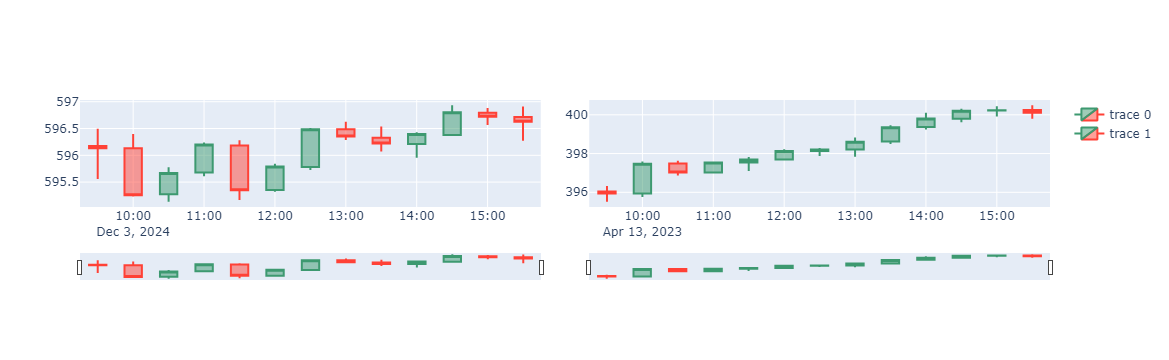

In [68]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

target1 = 482
target2 = 69

data_object = data.iloc[target1*13 : (target1 + 1)*13]
data_object2 = data.iloc[target2*13 : (target2 + 1)*13]

fig = make_subplots(
    rows=1, cols=2,
    shared_yaxes=False,
    horizontal_spacing=0.05
)

fig.add_trace(go.Candlestick(x=data_object['date'],open=data_object['1. open'],high=data_object['2. high'],low=data_object['3. low'],close=data_object['4. close']), row=1, col=1)
fig.add_trace(go.Candlestick(x=data_object2['date'],open=data_object2['1. open'],high=data_object2['2. high'],low=data_object2['3. low'],close=data_object2['4. close']), row=1, col=2)
fig.show()

In [69]:
## Embedding Extract

In [84]:
wandb.init()

In [87]:
from tqdm import tqdm

# 전체 데이터셋용 DataLoader (shuffle=False 필수)
full_loader = DataLoader(
    ds,
    batch_size=wandb.config.batch_size,
    shuffle=False
)


In [88]:
model.eval()

all_idx = []
all_codes = []
all_embs = []  # z_q 벡터 (옵션)

with torch.no_grad():
    for batch in tqdm(full_loader, desc="Extract VQ codes"):
        X = batch["x"].to(device)          # (B, C, T)
        idxs = batch["idx"]                # 전역 윈도우 index

        x_recon, vq_loss, indices_bt, z_q = model(X)
        # indices_bt: (B, T=1) → 각 윈도우당 하나의 코드
        codes = indices_bt.squeeze(1).cpu().numpy()   # (B,)
        z_vec = z_q.squeeze(-1).cpu().numpy()         # (B, latent_dim)

        all_idx.extend(idxs.cpu().numpy().tolist())
        all_codes.extend(codes.tolist())
        all_embs.extend(z_vec.tolist())


Extract VQ codes: 100%|██████████| 16/16 [00:00<00:00, 470.30it/s]


In [94]:
print(ds[1])

{'x': tensor([[0.5408, 0.5374, 0.2823, 0.5051, 0.6122, 0.9354, 0.8844, 0.7398, 0.8214,
         0.7245, 0.2551, 0.5544, 0.4694],
        [0.7092, 0.7262, 0.5059, 0.6275, 1.0000, 0.9600, 0.9762, 0.8674, 0.9065,
         0.9456, 0.5697, 0.6939, 0.6786],
        [0.3231, 0.0000, 0.1462, 0.3930, 0.6122, 0.8639, 0.7364, 0.6207, 0.6718,
         0.2041, 0.1939, 0.4456, 0.2068],
        [0.5493, 0.2806, 0.5059, 0.6090, 0.9320, 0.8835, 0.7381, 0.8214, 0.7041,
         0.2534, 0.5493, 0.4702, 0.6361],
        [0.4810, 0.5997, 0.1571, 0.1495, 0.4042, 0.0804, 0.0177, 0.1493, 0.0000,
         0.8152, 0.3566, 0.2410, 1.0000]]), 'idx': 1}


In [114]:
import os
# import boto3

chunk_size = ds.chunk_size
rows = []
for idx, code, emb in zip(all_idx, all_codes, all_embs):
    start = idx * chunk_size
    end = start + chunk_size
    ts = normalized_data.iloc[end - 1]["date"]
    ts = ts.date()

    row = {"date": ts, "code": int(code)}
    for j, v in enumerate(emb):
        row[f"z_{j}"] = float(v)
    rows.append(row)

df_vq = pd.DataFrame(rows).sort_values("date").reset_index(drop=True)

# 2) 로컬 임시 파일 경로
local_path = "prepared_data/embedding.csv"
df_vq.to_csv(local_path, index=False, encoding="utf-8-sig")

# # 3) S3 버킷/키 설정
# bucket_name = "sagemaker-us-west-2-327784329358"
# s3_prefix = "vq_vae_outputs/vq_codes.csv" 

# s3 = boto3.client("s3")
# s3.upload_file(local_path, bucket_name, s3_prefix)

# print(f"Uploaded to s3://{bucket_name}/{s3_prefix}")


In [1]:
import boto3
s3 = boto3.client("s3")
buckets = s3.list_buckets()["Buckets"]
print([b["Name"] for b in buckets])


['amazon-connect-9e878899667c', 'amazon-sagemaker-327784329358-ap-northeast-1-7ab59d8cd8a6', 'amazon-sagemaker-327784329358-us-east-1-9a22cf4474a1', 'amazon-sagemaker-327784329358-us-east-2-2121987a8f8b', 'amazon-sagemaker-327784329358-us-west-2-10227c2ebd87', 'amazon-sagemaker-cf-templates-us-west-2-5be648f5b1e8', 'aws-athena-query-results-327784329358-ap-northeast-2', 'aws-cloudtrail-logs-327784329358-c0ab6719', 'bedrock-agentcore-codebuild-sources-327784329358-us-east-1', 'inha-capstone-01-elec', 'inha-capstone-01-s3', 'inha-capstone-02-arxiv', 'inha-capstone-03-frontend', 'inha-capstone-03-km-routing-data', 'inha-capstone-04-s3-bucket-b1561a82deb5', 'inha-capstone-05-fe', 'inha-capstone-05-review', 'inha-capstone-06-perturba', 'inha-capstone-07-s3', 'inha-capstone-08-s3', 'inha-capstone-08-sagemaker-s3', 'inha-capstone-10-s3', 'inha-capstone-13-s3', 'inha-capstone-14-s3', 'inha-capstone-16-s3', 'inha-capstone-17-deploy-bundle', 'inha-capstone-19', 'jayden-langfuse', 'lucy-notebook-

In [3]:
import sagemaker
session = sagemaker.Session()
print(session.default_bucket())


sagemaker-us-west-2-327784329358
